In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import requests # library to handle requests
from bs4 import BeautifulSoup



In [15]:
conda install -c conda-forge geopy --yes 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install geocoder

     |████████████████████████████████| 98 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [196]:
berlin_postal = pd.read_csv('berlin_postalcodes.csv', engine = 'python')
berlin_postal.head()

,Postal Code,Borough
0,10115,Berlin-Mitte
1,10117,Berlin-Mitte
2,10119,Berlin-Mitte
3,10178,Berlin-Mitte
4,10179,Berlin-Mitte


In [234]:
berlin_coord = pd.read_csv('berlin_coords.csv', engine = 'python')
berlin_coord.head()

,Postal Code,Location
0,10115,52.532/13.385
1,10117,52.517/13.387
2,10119,52.53/13.405
3,10178,52.521/13.41
4,10179,52.512/13.416


In [235]:
berlin_coord2 ={}
berlin_coord2['Latitude'] = berlin_coord['Location'].str.split('/',expand=True)[0]
berlin_coord2['Longitude'] = berlin_coord['Location'].str.split('/',expand=True)[1]
berlin_coord2

{'Latitude': 0      52.532
 1      52.517
 2       52.53
 3      52.521
 4      52.512
         ...  
 108     52.42
 109    52.437
 110    52.418
 111    52.421
 112     52.45
 Name: 0, Length: 113, dtype: object,
 'Longitude': 0      13.385
 1      13.387
 2      13.405
 3       13.41
 4      13.416
         ...  
 108    13.144
 109    13.239
 110    13.254
 111    13.277
 112    13.257
 Name: 1, Length: 113, dtype: object}

In [236]:
berlin_coord['Latitude'] = berlin_coord2['Latitude'] 
berlin_coord['Longitude'] = berlin_coord2['Longitude']


berlin_coord

,Postal Code,Location,Latitude,Longitude
0,10115,52.532/13.385,52.532,13.385
1,10117,52.517/13.387,52.517,13.387
2,10119,52.53/13.405,52.53,13.405
3,10178,52.521/13.41,52.521,13.41
4,10179,52.512/13.416,52.512,13.416
...,...,...,...,...
108,14109,52.42/13.144,52.42,13.144
109,14163,52.437/13.239,52.437,13.239
110,14165,52.418/13.254,52.418,13.254
111,14167,52.421/13.277,52.421,13.277


In [248]:
berlin_data = pd.merge(berlin_postal, berlin_coord, on='Postal Code')

berlin_data

,Postal Code,Borough,Location,Latitude,Longitude
0,10115,Berlin-Mitte,52.532/13.385,52.532,13.385
1,10117,Berlin-Mitte,52.517/13.387,52.517,13.387
2,10119,Berlin-Mitte,52.53/13.405,52.53,13.405
3,10178,Berlin-Mitte,52.521/13.41,52.521,13.41
4,10179,Berlin-Mitte,52.512/13.416,52.512,13.416
...,...,...,...,...,...
108,14109,Wannsee,52.42/13.144,52.42,13.144
109,14163,Zehlendorf,52.437/13.239,52.437,13.239
110,14165,Zehlendorf,52.418/13.254,52.418,13.254
111,14167,Zehlendorf,52.421/13.277,52.421,13.277


In [249]:
berlin_data.drop('Location' , inplace = True, axis = 1)
berlin_data.head()

,Postal Code,Borough,Latitude,Longitude
0,10115,Berlin-Mitte,52.532,13.385
1,10117,Berlin-Mitte,52.517,13.387
2,10119,Berlin-Mitte,52.53,13.405
3,10178,Berlin-Mitte,52.521,13.41
4,10179,Berlin-Mitte,52.512,13.416


In [250]:
# should be hidden for security reasons
CLIENT_ID = '1L12G2AAK0TJBMUF25T1CFBW5DY5H351IWSGVQBWFWPRWKT4'
CLIENT_SECRET = 'OAZIAAPBXPARMRJRGJS3H00SGUC33VRG00V5EKUL5ZTTMTDA'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [251]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [259]:
berlin_venues = getNearbyVenues(names=berlin_data['Borough'],
                                   latitudes=berlin_data['Latitude'],
                                   longitudes=berlin_data['Longitude']
                                  )

Berlin-Mitte
Berlin-Mitte
Berlin-Mitte
Berlin-Mitte
Berlin-Mitte
Friedrichshain
Friedrichshain
Friedrichshain
Friedrichshain
Lichtenberg
Lichtenberg
Prenzlauer Berg
Prenzlauer Berg
Prenzlauer Berg
Prenzlauer Berg
Prenzlauer Berg
Prenzlauer Berg
Tiergarten
Tiergarten
Tiergarten
Tiergarten
Tiergarten
Charlottenburg
Charlottenburg
Charlottenburg
Charlottenburg
Charlottenburg
Charlottenburg
Charlottenburg
Wilmersdorf
Wilmersdorf
Wilmersdorf
Wilmersdorf
Wilmersdorf
Wilmersdorf
Tempelhof
Tempelhof
Tempelhof
Tempelhof
Tempelhof
Schöneberg
Schöneberg
Schöneberg
Schöneberg
Kreuzberg
Kreuzberg
Kreuzberg
Kreuzberg
Kreuzberg
Kreuzberg
Kreuzberg
Neukölln
Neukölln
Neukölln
Neukölln
Neukölln
Neukölln
Neukölln
Neukölln
Neukölln
Steglitz
Steglitz
Steglitz
Steglitz
Steglitz
Steglitz
Lichterfelde
Lichterfelde
Lichterfelde
Lichterfelde
Lankwitz
Lankwitz
Marienfelde
Marienfelde
Lichtenrade
Lichtenrade
Lichtenrade
Adlershof
Adlershof
Köpenick
Köpenick
Köpenick
Köpenick
Marzahn 
Marzahn 
Marzahn 
Marzahn 
Ma

In [260]:
print(berlin_venues.shape)
berlin_venues.head()

(3198, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berlin-Mitte,52.532,13.385,Hotel i31,52.531107,13.384270,Hotel
1,Berlin-Mitte,52.532,13.385,Oslo Kaffebar,52.531029,13.386889,Coffee Shop
2,Berlin-Mitte,52.532,13.385,REWE,52.531612,13.388092,Supermarket
3,Berlin-Mitte,52.532,13.385,Kunstfabrik Schlot,52.530325,13.385230,Jazz Club
4,Berlin-Mitte,52.532,13.385,Titanic Chaussee Berlin,52.532215,13.381012,Hotel


In [262]:
berlin_venues.groupby('Neighborhood').count() 
#we can see that the most venues are in Neukölln, Kreuzberg, Berlin-Mitte and Charlottenburg.

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adlershof,20,20,20,20,20,20
Berlin-Mitte,344,344,344,344,344,344
Charlottenburg,309,309,309,309,309,309
Friedrichshain,172,172,172,172,172,172
Kreuzberg,363,363,363,363,363,363
Köpenick,13,13,13,13,13,13
Lankwitz,19,19,19,19,19,19
Lichtenberg,43,43,43,43,43,43
Lichtenrade,12,12,12,12,12,12


In [284]:
berlin_venues.groupby('Venue Category').get_group('Bar')


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
146,Berlin-Mitte,52.53,13.405,Lass uns Freunde bleiben,52.533114,13.407183,Bar
153,Berlin-Mitte,52.53,13.405,Mein Haus am See,52.530006,13.400885,Bar
177,Berlin-Mitte,52.53,13.405,Trespassers,52.531216,13.408779,Bar
186,Berlin-Mitte,52.53,13.405,Ick koof mir Dave Lombardo wenn ick reich bin,52.533909,13.403352,Bar
199,Berlin-Mitte,52.53,13.405,Schurkenkeller,52.532644,13.410348,Bar
...,...,...,...,...,...,...,...
3010,Wedding,52.549,13.365,Jatz,52.550327,13.368970,Bar
3014,Wedding,52.549,13.365,WG Bar,52.549445,13.362061,Bar
3036,Wedding,52.558,13.347,Lale,52.554242,13.345153,Bar
3099,Wedding,52.55,13.383,Studio8,52.551925,13.386392,Bar


In [285]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhood'] = berlin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Neighborhood,ATM,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Warehouse Store,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Berlin-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berlin-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berlin-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berlin-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Berlin-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
berlin_onehot.shape

(3198, 321)

In [287]:
berlin_grouped = berlin_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped

,Neighborhood,ATM,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Warehouse Store,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Adlershof,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,Berlin-Mitte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.011628,0.002907,0.00000,0.000000,0.000000,0.000000
2,Charlottenburg,0.000000,0.000000,0.000000,0.000000,0.000000,0.003236,0.000000,0.000000,0.000000,...,0.003236,0.00000,0.000000,0.003236,0.000000,0.006472,0.00000,0.000000,0.003236,0.000000
3,Friedrichshain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.005814,0.00000,0.000000,0.000000,0.000000
4,Kreuzberg,0.002755,0.000000,0.011019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.013774,0.002755,0.008264,0.008264,0.00000,0.000000,0.002755,0.002755
5,Köpenick,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,Lankwitz,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
7,Lichtenberg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.023256
8,Lichtenrade,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
9,Lichterfelde,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.033333,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [288]:
berlin_grouped.shape

(26, 321)

In [289]:
#let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [290]:
#let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adlershof,Greek Restaurant,Pizza Place,Supermarket,Movie Theater,Bakery,Shopping Mall,Taverna,Tram Station,Trattoria/Osteria,Salon / Barbershop
1,Berlin-Mitte,Hotel,Coffee Shop,Italian Restaurant,Café,Bakery,Nightclub,Restaurant,Ice Cream Shop,Vietnamese Restaurant,Bar
2,Charlottenburg,Italian Restaurant,Café,Hotel,Bakery,Coffee Shop,Vietnamese Restaurant,Supermarket,Gourmet Shop,Asian Restaurant,Korean Restaurant
3,Friedrichshain,Bar,Hotel,Bakery,Nightclub,Café,Supermarket,Pizza Place,Drugstore,Indian Restaurant,Falafel Restaurant
4,Kreuzberg,Café,Coffee Shop,Italian Restaurant,Bar,Bakery,Ice Cream Shop,Vietnamese Restaurant,Pizza Place,Turkish Restaurant,Cocktail Bar


In [292]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ ##[0:10] 

array([0, 0, 0, 0, 0, 4, 3, 0, 3, 3, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       4, 0, 0, 3], dtype=int32)

In [293]:
# add clustering labels
neighborhoods_venues_sorted['Cluster Labels'] = kmeans.labels_

In [298]:
berlin_data.rename(columns={'Borough':'Neighborhood'}, inplace=True)

berlin_data

,Postal Code,Neighborhood,Latitude,Longitude
0,10115,Berlin-Mitte,52.532,13.385
1,10117,Berlin-Mitte,52.517,13.387
2,10119,Berlin-Mitte,52.53,13.405
3,10178,Berlin-Mitte,52.521,13.41
4,10179,Berlin-Mitte,52.512,13.416
...,...,...,...,...
108,14109,Wannsee,52.42,13.144
109,14163,Zehlendorf,52.437,13.239
110,14165,Zehlendorf,52.418,13.254
111,14167,Zehlendorf,52.421,13.277


In [299]:
berlin_merged = berlin_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

berlin_merged.head() # check the last columns!
berlin_merged=berlin_merged.dropna()

In [300]:
import folium # map rendering library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim 


In [301]:
address = 'Berlin'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.


In [306]:
berlin_merged['Latitude'] = berlin_merged['Latitude'].astype('float64')
berlin_merged['Longitude'] = berlin_merged['Longitude'].astype('float64')
berlin_merged.dtypes


Postal Code                 int64
Neighborhood               object
Latitude                  float64
Longitude                 float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
Cluster Labels              int32
dtype: object

In [307]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighborhood'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

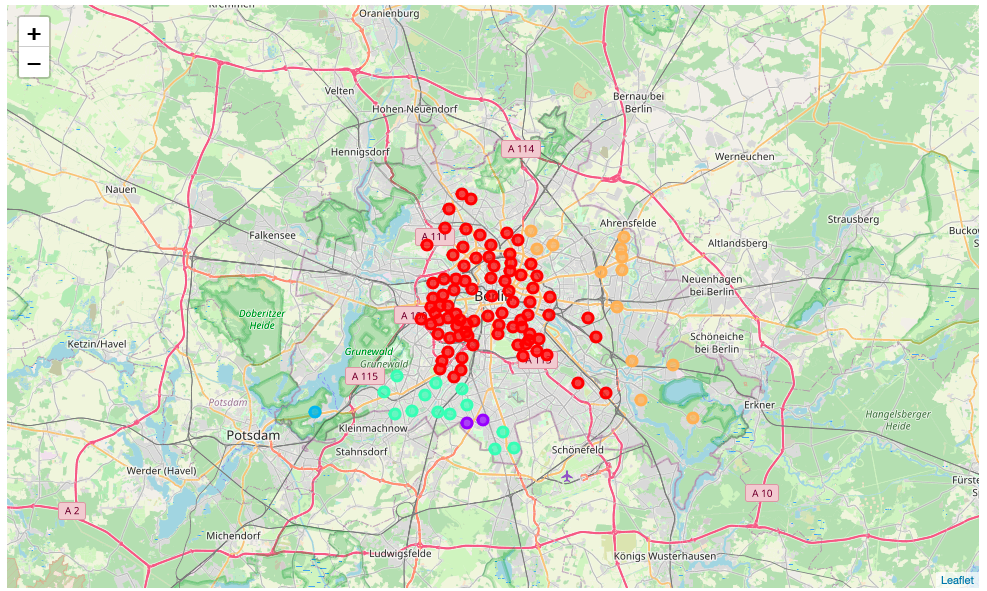

## Cluster 1

In [309]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]




,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Berlin-Mitte,Coffee Shop,Italian Restaurant,Café,Bakery,Nightclub,Restaurant,Ice Cream Shop,Vietnamese Restaurant,Bar,0
1,Berlin-Mitte,Coffee Shop,Italian Restaurant,Café,Bakery,Nightclub,Restaurant,Ice Cream Shop,Vietnamese Restaurant,Bar,0
2,Berlin-Mitte,Coffee Shop,Italian Restaurant,Café,Bakery,Nightclub,Restaurant,Ice Cream Shop,Vietnamese Restaurant,Bar,0
3,Berlin-Mitte,Coffee Shop,Italian Restaurant,Café,Bakery,Nightclub,Restaurant,Ice Cream Shop,Vietnamese Restaurant,Bar,0
4,Berlin-Mitte,Coffee Shop,Italian Restaurant,Café,Bakery,Nightclub,Restaurant,Ice Cream Shop,Vietnamese Restaurant,Bar,0
...,...,...,...,...,...,...,...,...,...,...,...
103,Reinickendorf,Miscellaneous Shop,German Restaurant,Hardware Store,Martial Arts School,Baby Store,BBQ Joint,Pet Store,Supermarket,Event Service,0
104,Reinickendorf,Miscellaneous Shop,German Restaurant,Hardware Store,Martial Arts School,Baby Store,BBQ Joint,Pet Store,Supermarket,Event Service,0
105,Wittenau,Restaurant,Pool,Gym,Eastern European Restaurant,Electronics Store,Park,Baseball Field,Gym / Fitness Center,Metro Station,0
106,Wittenau,Restaurant,Pool,Gym,Eastern European Restaurant,Electronics Store,Park,Baseball Field,Gym / Fitness Center,Metro Station,0


## Cluster 2

In [310]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]



,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
72,Marienfelde,Supermarket,Gas Station,Arcade,Soccer Field,Tennis Court,Diner,Shopping Mall,Food & Drink Shop,Food Court,1
73,Marienfelde,Supermarket,Gas Station,Arcade,Soccer Field,Tennis Court,Diner,Shopping Mall,Food & Drink Shop,Food Court,1


## Cluster 3

In [311]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 2, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]



,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
108,Wannsee,Organic Grocery,Farmers Market,Bus Stop,Art Gallery,Fountain,Food Truck,French Restaurant,Food Court,Food & Drink Shop,2


## Cluster 4

In [312]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 3, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]



,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
66,Lichterfelde,Plaza,Italian Restaurant,Bus Stop,Fast Food Restaurant,Chinese Restaurant,Park,Drugstore,Gas Station,Café,3
67,Lichterfelde,Plaza,Italian Restaurant,Bus Stop,Fast Food Restaurant,Chinese Restaurant,Park,Drugstore,Gas Station,Café,3
68,Lichterfelde,Plaza,Italian Restaurant,Bus Stop,Fast Food Restaurant,Chinese Restaurant,Park,Drugstore,Gas Station,Café,3
69,Lichterfelde,Plaza,Italian Restaurant,Bus Stop,Fast Food Restaurant,Chinese Restaurant,Park,Drugstore,Gas Station,Café,3
70,Lankwitz,Drugstore,Bakery,Pool,Movie Theater,German Restaurant,Liquor Store,Tennis Court,Sushi Restaurant,Supermarket,3
71,Lankwitz,Drugstore,Bakery,Pool,Movie Theater,German Restaurant,Liquor Store,Tennis Court,Sushi Restaurant,Supermarket,3
74,Lichtenrade,Bus Stop,Light Rail Station,Construction & Landscaping,Park,Tennis Court,Mexican Restaurant,Bakery,Italian Restaurant,Ice Cream Shop,3
75,Lichtenrade,Bus Stop,Light Rail Station,Construction & Landscaping,Park,Tennis Court,Mexican Restaurant,Bakery,Italian Restaurant,Ice Cream Shop,3
76,Lichtenrade,Bus Stop,Light Rail Station,Construction & Landscaping,Park,Tennis Court,Mexican Restaurant,Bakery,Italian Restaurant,Ice Cream Shop,3
109,Zehlendorf,Café,Supermarket,Mexican Restaurant,Greek Restaurant,Miscellaneous Shop,Tea Room,Lake,Asian Restaurant,Chocolate Shop,3


## Cluster 5

In [313]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 4, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]



,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
79,Köpenick,Soccer Field,American Restaurant,Tram Station,Bakery,Italian Restaurant,Gastropub,German Restaurant,Light Rail Station,Exhibit,4
80,Köpenick,Soccer Field,American Restaurant,Tram Station,Bakery,Italian Restaurant,Gastropub,German Restaurant,Light Rail Station,Exhibit,4
81,Köpenick,Soccer Field,American Restaurant,Tram Station,Bakery,Italian Restaurant,Gastropub,German Restaurant,Light Rail Station,Exhibit,4
82,Köpenick,Soccer Field,American Restaurant,Tram Station,Bakery,Italian Restaurant,Gastropub,German Restaurant,Light Rail Station,Exhibit,4
83,Marzahn,Tram Station,Drugstore,German Restaurant,Big Box Store,Grocery Store,Electronics Store,Park,Light Rail Station,Music Venue,4
84,Marzahn,Tram Station,Drugstore,German Restaurant,Big Box Store,Grocery Store,Electronics Store,Park,Light Rail Station,Music Venue,4
85,Marzahn,Tram Station,Drugstore,German Restaurant,Big Box Store,Grocery Store,Electronics Store,Park,Light Rail Station,Music Venue,4
86,Marzahn,Tram Station,Drugstore,German Restaurant,Big Box Store,Grocery Store,Electronics Store,Park,Light Rail Station,Music Venue,4
87,Marzahn,Tram Station,Drugstore,German Restaurant,Big Box Store,Grocery Store,Electronics Store,Park,Light Rail Station,Music Venue,4
88,Marzahn,Tram Station,Drugstore,German Restaurant,Big Box Store,Grocery Store,Electronics Store,Park,Light Rail Station,Music Venue,4


## Observations:
We can see the most common categories in each clusters.

In [25]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_in_Germany#Berlin'
##url = 'https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin'
response = requests.get(url).text
data = BeautifulSoup(response, 'lxml')
data

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes in Germany - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1afd5278-b438-4e29-9f93-796536892736","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_in_Germany","wgTitle":"List of postal codes in Germany","wgCurRevisionId":1015755524,"wgRevisionId":1015755524,"wgArticleId":682065,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Articles lacking sources from Apr

In [175]:
#soup = data
#row = soup.find('a', { 'title' : 'Berlin-Mitte' })
#print(row)

soup = data
#row3 = soup.find(title="Berlin-Mitte")
#print(row3.get('title')) --ok
berlin_data = ['Postal Code','Borough']

row4 = soup.find(text = '10115, 10117, 10119, 10178, 10179 – ') 
count = 0
#row5 =     row4.next_sibling.text

#--ok
#for a in row4:
while count != 52:
    if count % 2 == 0:
        print(type(row4))
        berlin_data['Postal Code'] = row4.split(',')
        row4 = row4.next_sibling
        count = count + 1
    else:
        berlin_data['Borough'] = row4.text
        row4 = row4.next_sibling
        count = count + 1


    

#print(row4)
#print(row4.next_sibling.type)

#soup.find('li', { 'text' : '5-digit System since 1993'})
#print(soup.li)
#print(row4)




#row = soup.find_all('li')
#print(row)
#row = soup.findAll('li')
#row2  = row.find('li', { 'text' : '10115, 10117, 10119, 10178, 10179 – '})
#row3 = soup.find_all(True, class_="mw-redirect" href="/wiki/Berlin-Mitte")
#row2 = row.find('a')
#for a in row:
#    if(a.title =='Scheinfeld'):
#        print(a.title, end=" ")
    #for a in soup.find_all("li"):
#        print(a.text, end=" ")

#data1 = data.find('ul')
#for li in data1.find_all("li"):
#    print(li.text, end=" ")


<class 'bs4.element.NavigableString'>


TypeError: list indices must be integers or slices, not str

In [51]:
table_contents=[]
#table=data.find('table')
for row in data.findAll('ul'):
    cell = {}
    if row.stripped_strings =='10, 12, 13, 14xxx – Berlin (This is an incomplete list':
        cell['PostalCode'] = (row.li.text)
        print(cell)
        cell['Borough'] = (row.a.text)
#        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)
    else:
        pass

# print(table_contents)
df=pd.DataFrame(table_contents)                        
                    



In [194]:
#row5 = ((((row4.split(',')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
 
row5 = row4.split(',')[4]

print(row5)

 10179 – 


In [24]:






import geocoder 

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Berlin, Germany'.format(10249))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

KeyboardInterrupt: 

In [6]:
url = 'https://worldpostalcode.com/turkey/izmir/cesme'
##url = 'https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin'
response = requests.get(url).text
data = BeautifulSoup(response, 'lxml')
data

<!DOCTYPE HTML>
<html lang="en">
<head>
<title>Cesme, Turkey Postal Codes</title>
<meta content="Postal codes for Cesme, Turkey. Use our interactive map, address lookup, or code list to find the correct zip code for your postal mails destination." name="Description"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<link href="/favicon/site.webmanifest" rel="manifest"/>
<link color="#5bbad5" href="/favicon/safari-pinned-tab.svg" rel="mask-icon"/>
<link href="/favicon/favicon.ico" rel="shortcut icon"/>
<meta content="/favicon/browserconfig.xml" name="msapplication-config"/>
<script>
        !function(e){"use strict";var n=function(n,t,o){function i(e

In [11]:
columns_name = ['İlçeler','Posta Kodu']
izmir_df = pd.DataFrame(columns = columns_name)

In [2]:
# hidden for security reasons
CLIENT_ID = '1L12G2AAK0TJBMUF25T1CFBW5DY5H351IWSGVQBWFWPRWKT4'
CLIENT_SECRET = 'OAZIAAPBXPARMRJRGJS3H00SGUC33VRG00V5EKUL5ZTTMTDA'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [3]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)